<a href="https://colab.research.google.com/github/ybq9430/ZUOYE/blob/main/source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data (Dachshund / Jindo)



In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]

# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data))

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))

dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))

# 待判定的新样本（建议转为np.array，后续切片更方便）
# 새 샘플 (np.array 권장)
newdata = np.array([[52, 42]])

dog_classes = {0:'Dachshund', 1:'Jindo dog'}


# 补充的函数：把新点与k个最近邻连接，并高亮邻居
# 보조 함수: 새 점과 k-최근접 이웃을 선으로 연결하고 강조


In [3]:
def draw_neighbor(ax, X_all, neighbor_indices, k):
    idxs = neighbor_indices[0]
    # 新点 -> 邻居 画虚线
    for i in idxs:
        ax.plot([newdata[0,0], X_all[i,0]],
                [newdata[0,1], X_all[i,1]],
                linestyle='--', linewidth=1.2)
    # 邻居点描边（空心圆）/ 이웃 포인트 외곽선 표시
    ax.scatter(X_all[idxs,0], X_all[idxs,1],
               s=140, facecolors='none', edgecolors='black',
               linewidths=1.5, label=f'{k}-NN neighbors')

# 依次用 k=5 和 k=9 训练并可视化
# k=5, 9 각각 학습/시각화

k = 5
데이터 [[52, 42]] 판정 결과: Jindo dog
distances [[ 5.38516481  7.          8.54400375  8.94427191 10.77032961]] indexes: [[ 6 14 12 10  8]]
----------------------------------------


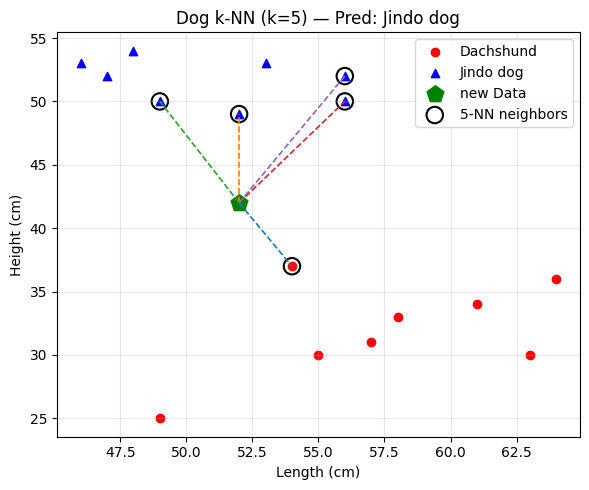

k = 9
데이터 [[52, 42]] 판정 결과: Jindo dog
distances [[ 5.38516481  7.          8.54400375  8.94427191 10.77032961 10.81665383
  11.04536102 11.18033989 12.04159458]] indexes: [[ 6 14 12 10  8  4 13  9  7]]
----------------------------------------


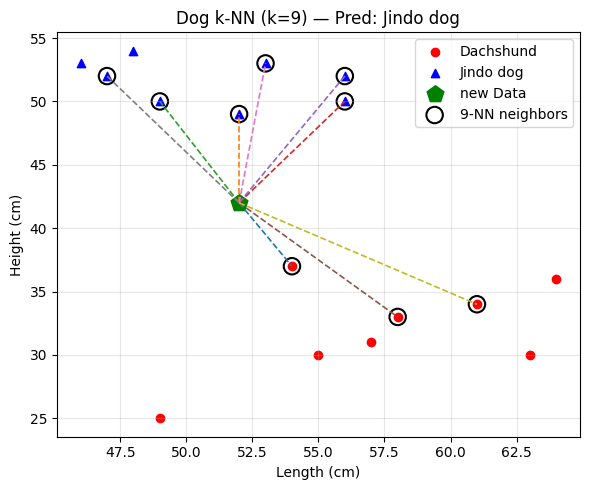

In [4]:

for k in [5, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(dogs, labels)

    y_pred = knn.predict(newdata)
    distances, indexes = knn.kneighbors(newdata)

    print(f'k = {k}')
    print('데이터', newdata.tolist(), '판정 결과:', dog_classes[int(y_pred[0])])
    print('distances', distances, 'indexes:', indexes)
    print('-' * 40)

    # 可视化
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.scatter(dach_length, dach_height, c='red', label='Dachshund')
    ax.scatter(jin_length, jin_height, c='blue', marker='^', label='Jindo dog')
    ax.scatter(newdata[0,0], newdata[0,1], s=160, marker='p', c='green', label='new Data')

    draw_neighbor(ax, dogs, indexes, k)

    ax.set_xlabel('Length (cm)')
    ax.set_ylabel('Height (cm)')
    ax.set_title(f'Dog k-NN (k={k}) — Pred: {dog_classes[int(y_pred[0])]}')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 판정 결과 / 判定结果：Jindo dog

- 그래프에서 볼 수 있듯이, 새 데이터는 여러 진돗개 표본에 더 가까워
- 거리선(점선)으로 연결된 이웃 대부분이 파란색으로 표시된다.
- 따라서 최종적으로 Jindo dog 으로 분류되었다.

- 如图所示，绿色五边形的新数据点与多个蓝色三角形（珍岛犬样本）更接近，
- 其虚线连接的最近邻大部分为蓝色，因此最终被分类为 珍岛犬（Jindo dog）。

